In [1]:
#由于gii保存的都是值为0/1的ROI图片所以可以转换为png不受影响
import nibabel as nib 
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pydicom

In [10]:
#读取roi信息为矩阵
roi_path = 'F:/GuiYiXray&MRI/X_ray&MRI/Her_2/Bai Li Xiu/MRI/4/4.nii.gz'
roi_data = nib.load(roi_path).get_data()

ipykernel_launcher:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


In [11]:
rois = np.array(roi_data, dtype=np.int)
print(rois.shape)

(480, 480, 100)


In [4]:
#读取dicom图像的信息
dcm_path = 'F:/GuiYiXray&MRI/X_ray&MRI/Her_2/Bai Li Xiu/MRI/4/'
#读取dcm_path下每一个dicom格式的文件名
dcm_num = 100
dirs = os.listdir(dcm_path)
dcm_names = []
i = 0
#读取.DCM的文件名
for file_name in dirs:
    if os.path.splitext(file_name)[1] =='.DCM':
        full_file_name = dcm_path + file_name 
        dcm_names.append(full_file_name)
#读取.DCM图像
dcms = []
for dcm_name in dcm_names:
    dcm = pydicom.dcmread(dcm_name).pixel_array
    dcms.append(dcm)

In [16]:
dcms = np.array(dcms)
print(dcms.shape)

(100, 480, 480)


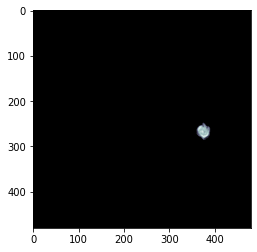

In [20]:
minROIs = []
for i in range(100):
    if np.max(rois[:,:,i]) > 0:
        ROI = np.multiply(dcms[i],np.transpose(rois[:,:,i]))
        minROIs.append(ROI)
        plt.imshow(ROI, cmap = plt.cm.bone)


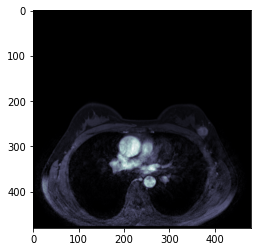

In [19]:
plt.imshow(dcms[64], cmap = plt.cm.bone)